# Chess Board Detection

## Detect the bottom left corner (8h) of the chessboard

We first get the images

In [ ]:
import os
import sys
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [3]:
# all files in the /datasets/chess folder

# get the current working directory
cwd = os.getcwd()

# get the list of all files in the ../../datasets/chess folder
image_paths = glob.glob(os.path.join(cwd, '../../datasets/chess/*'))

print(image_paths)

['/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.29.08.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.32.06.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.27.26.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.31.53.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.32.02.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.31.45.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.27.52.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screens

Step 1 : Read the image

In [5]:
def show_cv2_image(image, title='image'):
  plt.figure()
  plt.title(title)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [27]:
def dataset_path(path):
  return os.path.join(cwd, '../../datasets', path)

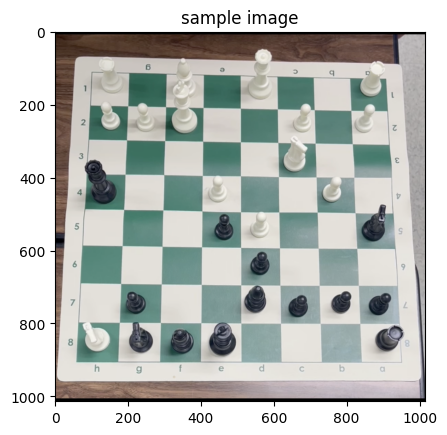

In [7]:
sample_image_path = image_paths[0]

sample_image = cv2.imread(sample_image_path)

show_cv2_image(sample_image, "sample image")

Step 2 : OCR the image to get the text

In [8]:
from PIL import Image
import pytesseract

In [20]:
def ocr_image(image):
  return pytesseract.image_to_string(Image.fromarray(image))

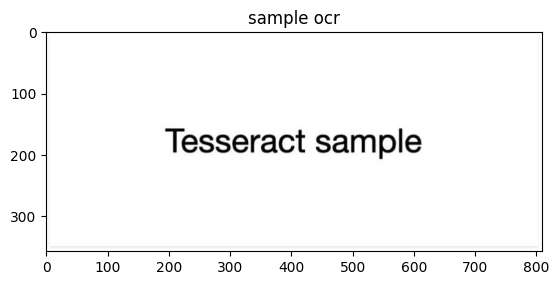

In [31]:
show_cv2_image(cv2.imread(dataset_path('image-ocr.jpg')), "sample ocr")

In [28]:
filename = dataset_path('image-ocr.jpg')

ocr_input = cv2.imread(filename)

print(f'Result: {ocr_image(ocr_input)}')

Result: Tesseract sample



In [25]:
img1 = np.array(Image.open(sample_image_path))
text = pytesseract.image_to_string(img1)

print(f'Result: {text}')

Result: 


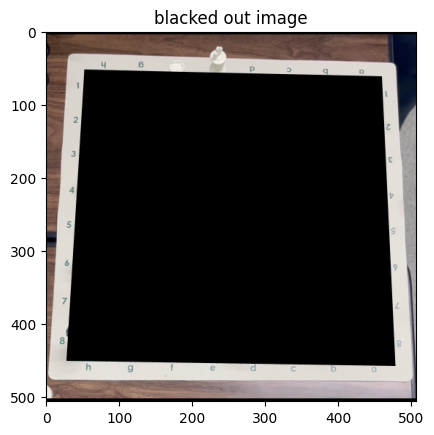

In [33]:
show_cv2_image(cv2.imread(dataset_path('chess_black.png')), "blacked out image")

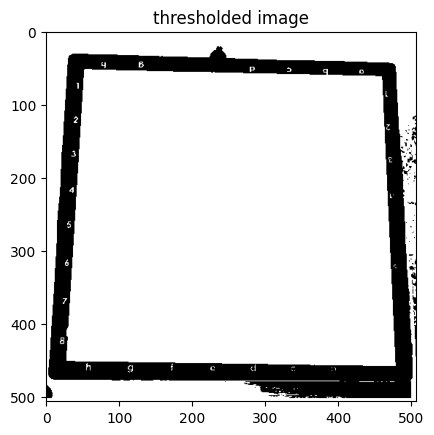

In [50]:
# boost contrast
chess_black = cv2.imread(dataset_path('chess_black.png'))

# thresholding
chess_black = cv2.imread(dataset_path('chess_black.png'), cv2.IMREAD_GRAYSCALE)

_, chess_black = cv2.threshold(chess_black, 165, 255, cv2.THRESH_BINARY_INV)

show_cv2_image(chess_black, "thresholded image")

In [51]:
result = ocr_image(chess_black)

print(f'Result: {result}')

Result: 


In [52]:

# Imports the Google Cloud client library
from google.cloud import vision


def run_quickstart() -> vision.EntityAnnotation:
    """Provides a quick start example for Cloud Vision."""

    # Instantiates a client
    client = vision.ImageAnnotatorClient()

    # The URI of the image file to annotate
    file_uri = "gs://cloud-samples-data/vision/label/wakeupcat.jpg"

    image = vision.Image()
    image.source.image_uri = file_uri

    # Performs label detection on the image file
    response = client.label_detection(image=image)
    labels = response.label_annotations

    print("Labels:")
    for label in labels:
        print(label.description)

    return labels